In [101]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder



In [102]:
import sys
print(sys.executable)


c:\Users\dhent\AppData\Local\Programs\Python\Python313\python.exe


In [103]:
import pandas as pd
print(pd.__version__)

2.2.3


In [104]:
# Corrected file path
file_path = r"C:\Users\dhent\OneDrive\Desktop\Cancer Prediction\Hackathon 2\Thyroid-Risk-Analysis-1\thyroid_cancer_risk_data.csv"

# Load the dataset
df = pd.read_csv(file_path)


In [105]:
# Display basic dataset information
print("\nDataset Information:\n")
df.info()
print("\nFirst 5 Rows of the Dataset:\n", df.head())




Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64

In [106]:
# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Dataset:\n", missing_values[missing_values > 0])




Missing Values in Dataset:
 Series([], dtype: int64)


In [107]:
# Summary statistics for numerical variables
num_summary = df.describe()
print("\nSummary Statistics:\n", num_summary)




Summary Statistics:
          Patient_ID            Age      TSH_Level       T3_Level  \
count  212691.00000  212691.000000  212691.000000  212691.000000   
mean   106346.00000      51.918497       5.045102       2.001727   
std     61398.74739      21.632815       2.860264       0.866248   
min         1.00000      15.000000       0.100000       0.500000   
25%     53173.50000      33.000000       2.570000       1.250000   
50%    106346.00000      52.000000       5.040000       2.000000   
75%    159518.50000      71.000000       7.520000       2.750000   
max    212691.00000      89.000000      10.000000       3.500000   

            T4_Level    Nodule_Size  
count  212691.000000  212691.000000  
mean        8.246204       2.503403  
std         2.164188       1.444631  
min         4.500000       0.000000  
25%         6.370000       1.250000  
50%         8.240000       2.510000  
75%        10.120000       3.760000  
max        12.000000       5.000000  


In [108]:
# Checking for duplicate records
duplicate_count = df.duplicated().sum()
print("\nNumber of Duplicate Records:", duplicate_count)




Number of Duplicate Records: 0


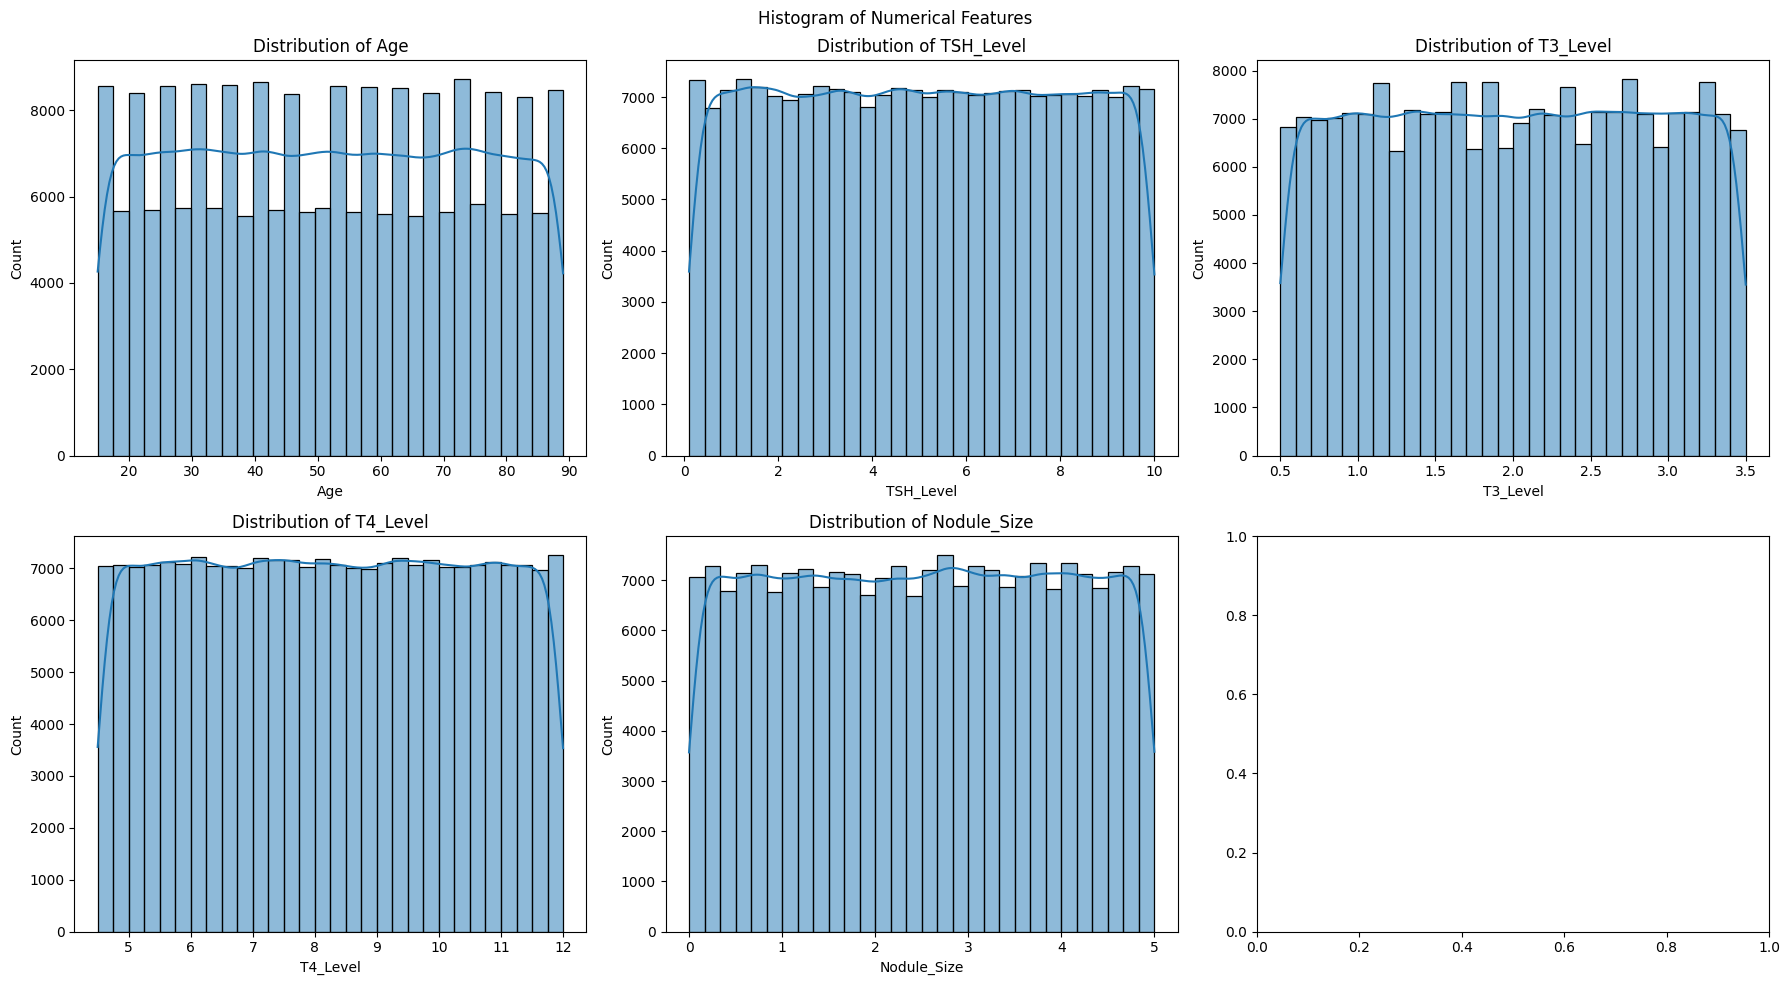

In [109]:
# Univariate Analysis: Distribution of Numerical Variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Histogram of Numerical Features")
numerical_features = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()



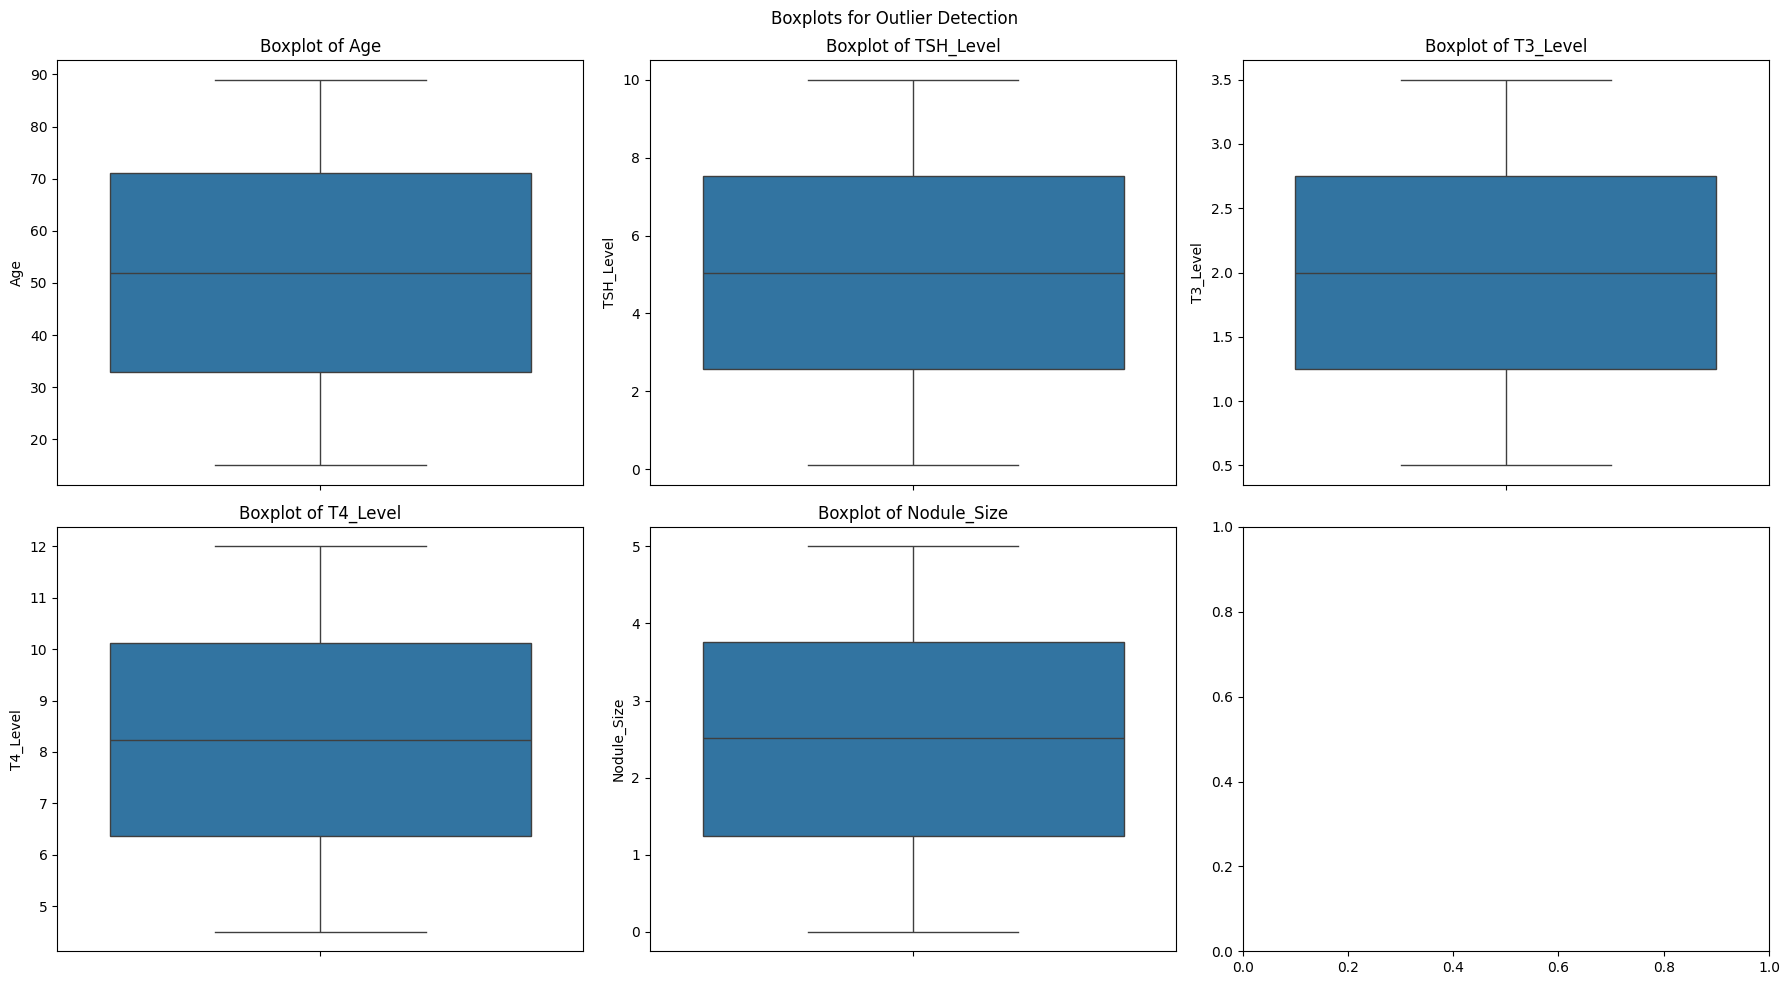

In [110]:
# Outlier Detection using Boxplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Boxplots for Outlier Detection")
for i, feature in enumerate(numerical_features):
    sns.boxplot(y=df[feature], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


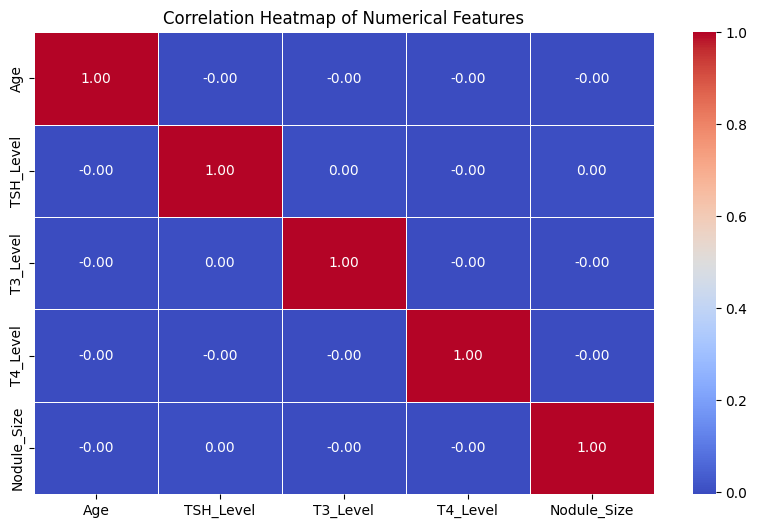

In [111]:

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()



C:\Users\dhent\AppData\Local\Temp\ipykernel_41136\1341815804.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




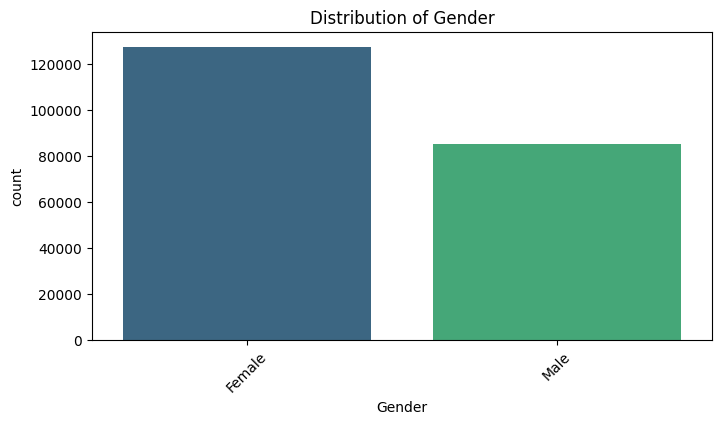

C:\Users\dhent\AppData\Local\Temp\ipykernel_41136\1341815804.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




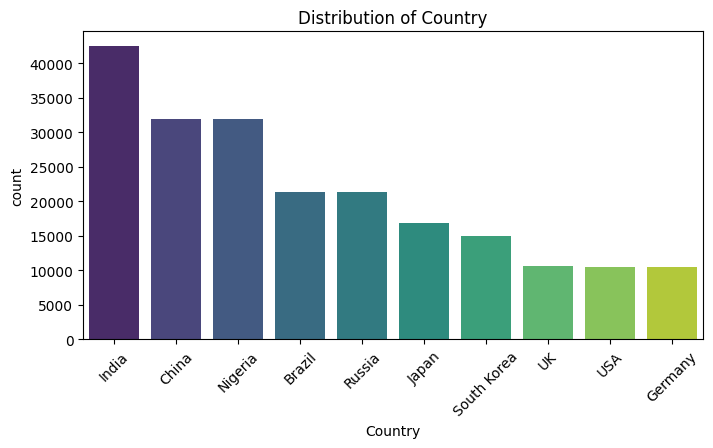

C:\Users\dhent\AppData\Local\Temp\ipykernel_41136\1341815804.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




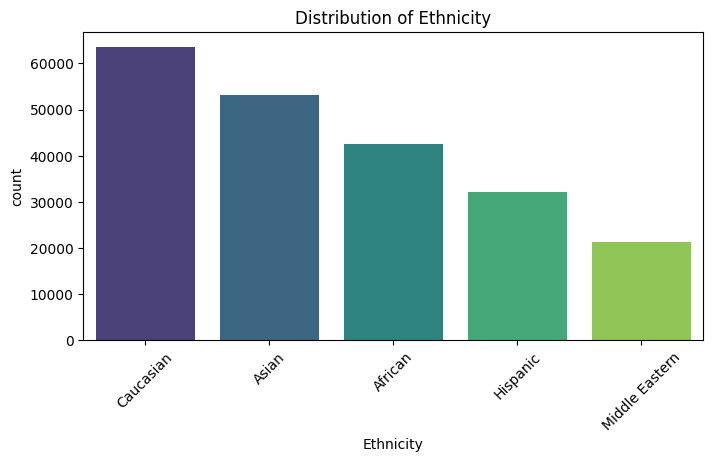

C:\Users\dhent\AppData\Local\Temp\ipykernel_41136\1341815804.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




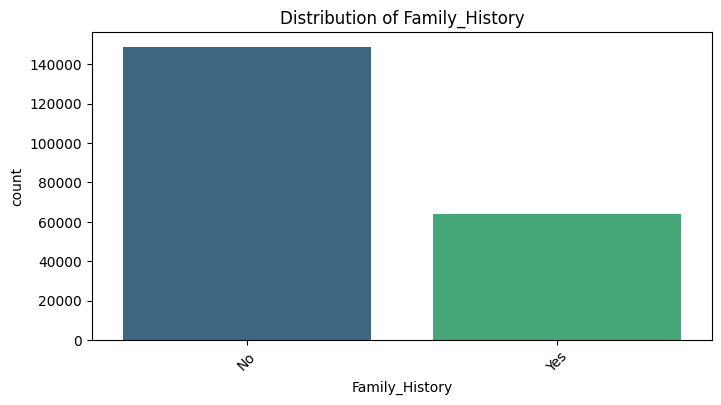

C:\Users\dhent\AppData\Local\Temp\ipykernel_41136\1341815804.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




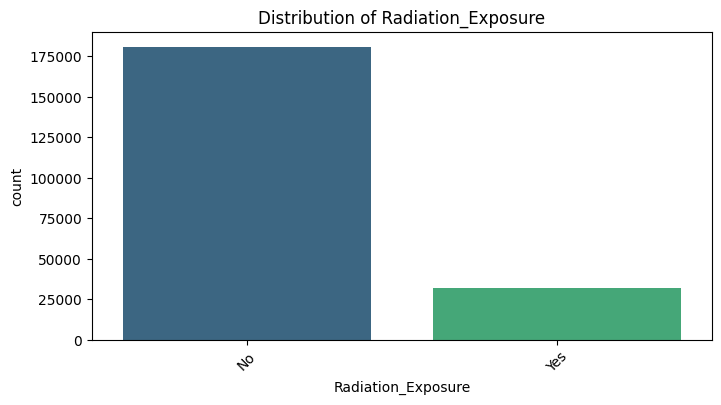

C:\Users\dhent\AppData\Local\Temp\ipykernel_41136\1341815804.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




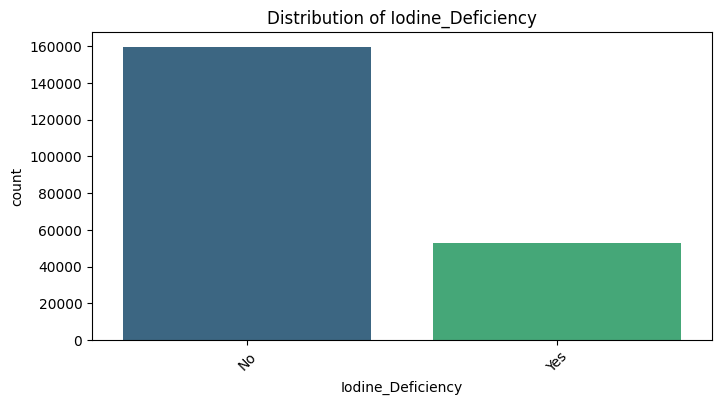

C:\Users\dhent\AppData\Local\Temp\ipykernel_41136\1341815804.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




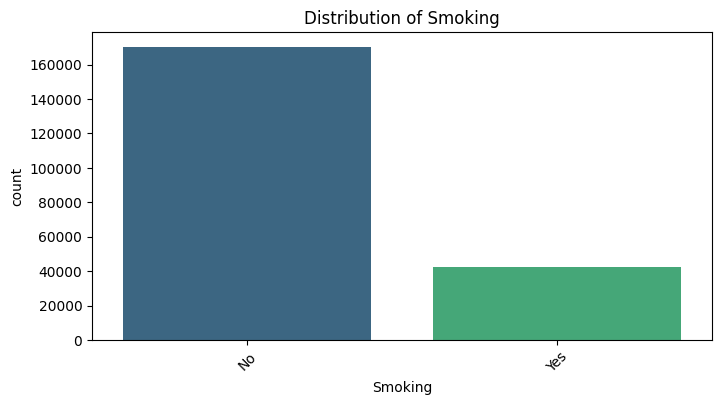

C:\Users\dhent\AppData\Local\Temp\ipykernel_41136\1341815804.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




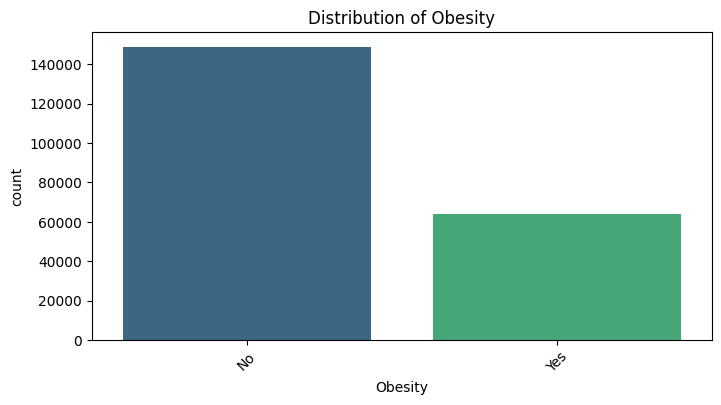

C:\Users\dhent\AppData\Local\Temp\ipykernel_41136\1341815804.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




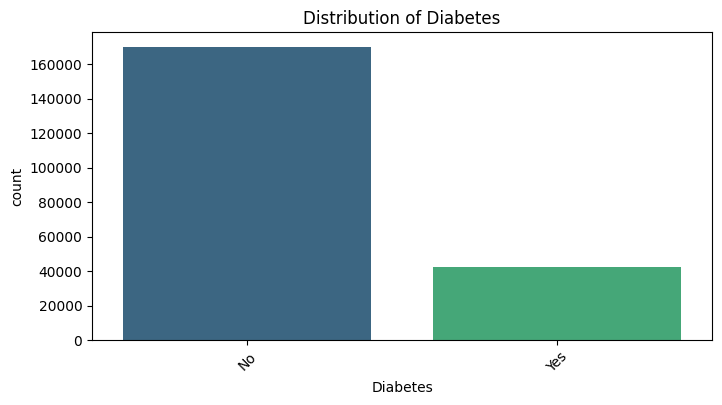

C:\Users\dhent\AppData\Local\Temp\ipykernel_41136\1341815804.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




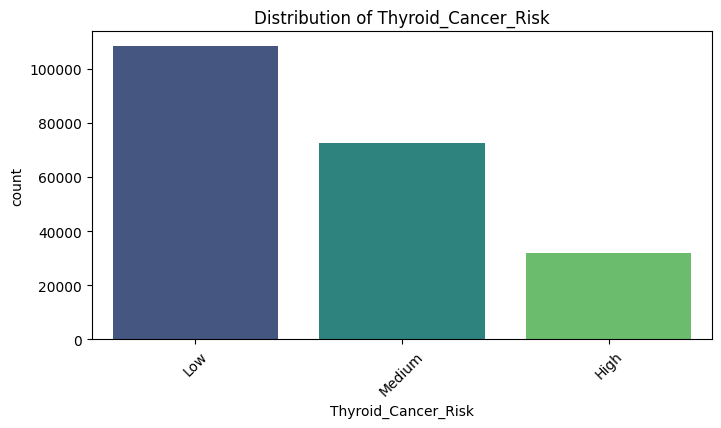

C:\Users\dhent\AppData\Local\Temp\ipykernel_41136\1341815804.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




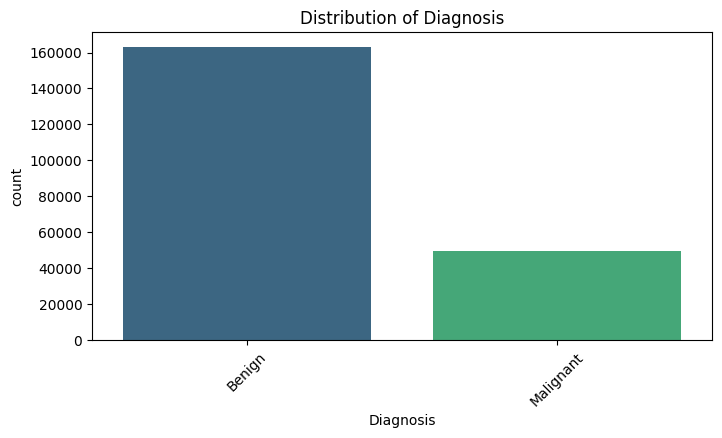


Exploratory Data Analysis (EDA) Completed Successfully.


In [112]:
# Categorical Variable Analysis
categorical_columns = ["Gender", "Country", "Ethnicity", "Family_History", "Radiation_Exposure", "Iodine_Deficiency", 
                        "Smoking", "Obesity", "Diabetes", "Thyroid_Cancer_Risk", "Diagnosis"]
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()

print("\nExploratory Data Analysis (EDA) Completed Successfully.")

In [113]:
# Encode categorical variables for analysis
from sklearn.preprocessing import LabelEncoder

In [114]:
cancer_cases_by_country = df.groupby(["Country", "Thyroid_Cancer_Risk"]).size().reset_index(name="Count")
total_counts = df.groupby("Country").size().reset_index(name="Total")
cancer_cases_by_country = cancer_cases_by_country.merge(total_counts, on="Country")
cancer_cases_by_country["Proportion"] = (cancer_cases_by_country["Count"] / cancer_cases_by_country["Total"]) * 100  # Convert to percentage

In [115]:
custom_color_scale = [[0.0, "green"], [0.5, "yellow"], [1.0, "red"]]

In [116]:
fig_geo = px.choropleth(
    cancer_cases_by_country,
    locations="Country",
    locationmode="country names",
    color="Proportion",
    facet_row="Thyroid_Cancer_Risk",  # Stack maps vertically
    color_continuous_scale=custom_color_scale,  # Apply the custom color scale
    title="Geospatial Distribution of Thyroid Cancer Risk by Level",
    labels={"Proportion": "Proportion of Risk Level (%)"}  # Update label to show percentage
)


In [117]:
fig_geo.update_layout(
    coloraxis=dict(
        colorbar=dict(
            title="Risk Proportion (%)",
            tickvals=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],  # More precise percentage values
            ticktext=["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"],  # Explicit numeric labels in percentage
             tickfont=dict(size=16)  # Increase font size for tick labels
        )
    ),
    height=1600,  # Increase figure height for larger maps
    margin={"r": 0, "t": 40, "l": 0, "b": 0}
)

fig_geo.show()



In [118]:
print(cancer_cases_by_country)


        Country Thyroid_Cancer_Risk  Count  Total  Proportion
0        Brazil                High   2308  21413   10.778499
1        Brazil                 Low  11354  21413   53.023864
2        Brazil              Medium   7751  21413   36.197637
3         China                High   3469  31978   10.848083
4         China                 Low  17140  31978   53.599350
5         China              Medium  11369  31978   35.552567
6       Germany                High   1117  10557   10.580657
7       Germany                 Low   5704  10557   54.030501
8       Germany              Medium   3736  10557   35.388842
9         India                High  13965  42496   32.861916
10        India                 Low  17117  42496   40.279085
11        India              Medium  11414  42496   26.858998
12        Japan                High   1697  16867   10.061066
13        Japan                 Low   9108  16867   53.998933
14        Japan              Medium   6062  16867   35.940001
15      

In [119]:
# Convert categorical variables to numerical values
df['Thyroid_Cancer_Risk_Numeric'] = df['Thyroid_Cancer_Risk'].map({'Low': 1, 'Medium': 2, 'High': 3})
df['Gender_Binary'] = df['Gender'].map({'Female': 1, 'Male': 0})

# Define independent variables (without intercept)
X_ordinal = df[['Age', 'Gender_Binary']]

# Fit ordinal logistic regression model
ordinal_model = OrderedModel(df['Thyroid_Cancer_Risk_Numeric'], X_ordinal, distr='logit')
ordinal_result = ordinal_model.fit(method='bfgs')

# Display the summary of results
print(ordinal_result.summary())

Optimization terminated successfully.
         Current function value: 0.994911
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 16
                                  OrderedModel Results                                 
Dep. Variable:     Thyroid_Cancer_Risk_Numeric   Log-Likelihood:            -2.1161e+05
Model:                            OrderedModel   AIC:                         4.232e+05
Method:                     Maximum Likelihood   BIC:                         4.233e+05
Date:                         Thu, 06 Feb 2025                                         
Time:                                 23:28:24                                         
No. Observations:                       212691                                         
Df Residuals:                           212687                                         
Df Model:                                    2                                         
                    coef    std err 

In [127]:
import ipywidgets as widgets
from IPython.display import display

# Function to predict thyroid cancer risk
def predict_thyroid_risk(age, gender='Female'):
    gender_binary = 1 if gender == 'Female' else 0
    
    log_odds_low_medium = ordinal_result.params['Age'] * age + ordinal_result.params['Gender_Binary'] * gender_binary + ordinal_result.params['1/2']
    log_odds_medium_high = ordinal_result.params['Age'] * age + ordinal_result.params['Gender_Binary'] * gender_binary + ordinal_result.params['2/3']
    
    prob_low = 1 / (1 + np.exp(-log_odds_low_medium))
    prob_medium = 1 / (1 + np.exp(-log_odds_medium_high)) - prob_low
    prob_high = 1 - (prob_low + prob_medium)
    
    return prob_low, prob_medium, prob_high

# Create interactive widgets
age_slider = widgets.IntSlider(min=15, max=90, value=30, description="Age:")
gender_dropdown = widgets.Dropdown(options=["Female", "Male"], value="Female", description="Gender:")
output = widgets.Output()

# Function to update prediction
def update_prediction(change):
    with output:
        output.clear_output()
        age = age_slider.value
        gender = gender_dropdown.value
        prob_low, prob_medium, prob_high = predict_thyroid_risk(age, gender)
        display(f"For Age: {age}, Gender: {gender}")
        display(f"Probability of Low Risk: {prob_low:.4f}")
        display(f"Probability of Medium Risk: {prob_medium:.4f}")
        display(f"Probability of High Risk: {prob_high:.4f}")

# Attach event handlers
age_slider.observe(update_prediction, names="value")
gender_dropdown.observe(update_prediction, names="value")

# Display widgets and output
display(age_slider, gender_dropdown, output)

IntSlider(value=30, description='Age:', max=90, min=15)

Dropdown(description='Gender:', options=('Female', 'Male'), value='Female')

Output()

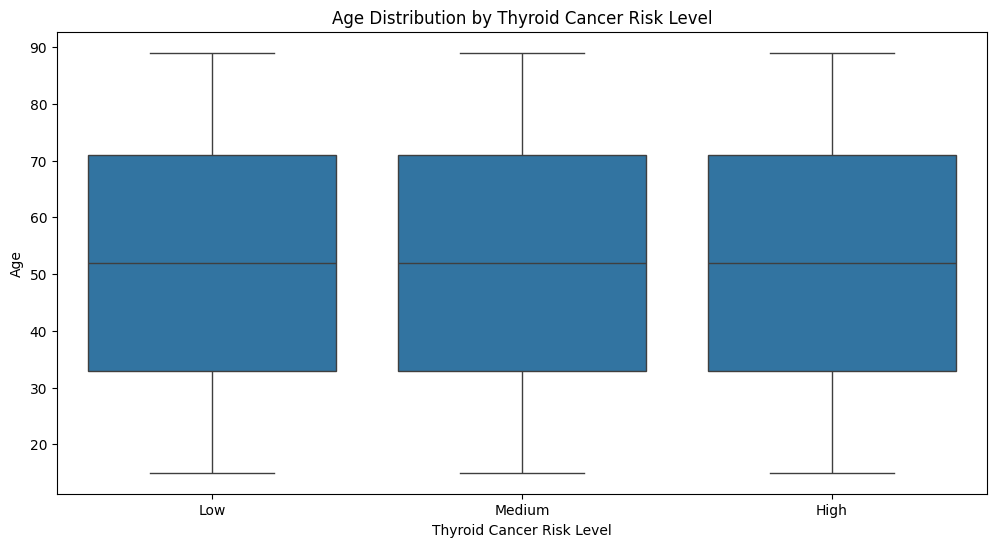

In [124]:
# Plot Age Distribution by Thyroid Cancer Risk
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Thyroid_Cancer_Risk'], y=df['Age'])
plt.title("Age Distribution by Thyroid Cancer Risk Level")
plt.xlabel("Thyroid Cancer Risk Level")
plt.ylabel("Age")
plt.show()

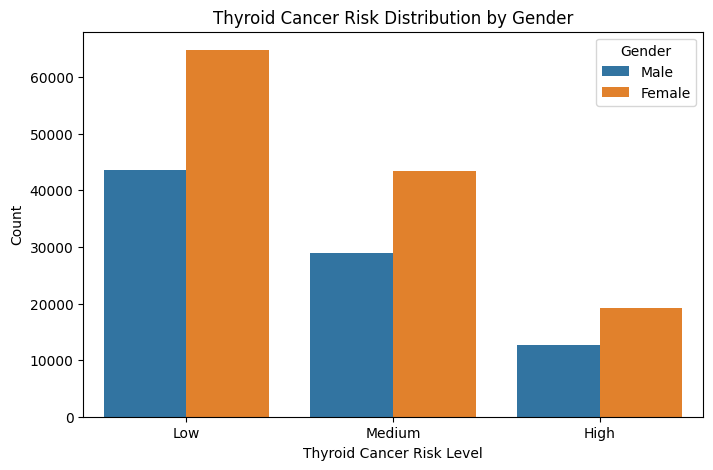

In [125]:
# Plot Gender Proportion in Thyroid Cancer Risk
plt.figure(figsize=(8, 5))
sns.countplot(x='Thyroid_Cancer_Risk', hue='Gender', data=df)
plt.title("Thyroid Cancer Risk Distribution by Gender")
plt.xlabel("Thyroid Cancer Risk Level")
plt.ylabel("Count")
plt.show()